## Import libraries

In [65]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from scipy.stats import zscore

## Get the data

In [66]:
df = pd.read_csv("../../../datasets/parte2/treino/dataset.csv")

## Feature engineering

#### Split date

In [67]:
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d", utc=True)
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df.drop(['date'], inplace=True, axis=1)


df.head()

,dt,city_name,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,...,clouds_all,weather_description,hour,normal,economic_schedule,self-consumption,injection,year,month,day
0,1632873600,local,13.97,13.54,11.45,14.04,1027,NaN,NaN,81,...,87,overcast clouds,0,0.0,0.0,0.0,NaN,2021,9,29
1,1632877200,local,13.48,13.02,13.43,13.90,1028,NaN,NaN,82,...,91,overcast clouds,1,0.0,0.0,0.0,NaN,2021,9,29
2,1632880800,local,12.93,12.47,12.72,13.43,1027,NaN,NaN,84,...,93,overcast clouds,2,0.0,0.0,0.0,NaN,2021,9,29
3,1632884400,local,12.61,12.15,10.34,12.93,1027,NaN,NaN,85,...,95,overcast clouds,3,0.0,0.0,0.0,NaN,2021,9,29
4,1632888000,local,12.61,12.17,9.79,12.93,1027,NaN,NaN,86,...,93,overcast clouds,4,0.0,0.0,0.0,NaN,2021,9,29


#### Remove city_name

In [68]:
df.drop('city_name', axis=1, inplace=True)

df.head()

,dt,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,...,clouds_all,weather_description,hour,normal,economic_schedule,self-consumption,injection,year,month,day
0,1632873600,13.97,13.54,11.45,14.04,1027,NaN,NaN,81,1.96,...,87,overcast clouds,0,0.0,0.0,0.0,NaN,2021,9,29
1,1632877200,13.48,13.02,13.43,13.90,1028,NaN,NaN,82,1.83,...,91,overcast clouds,1,0.0,0.0,0.0,NaN,2021,9,29
2,1632880800,12.93,12.47,12.72,13.43,1027,NaN,NaN,84,1.96,...,93,overcast clouds,2,0.0,0.0,0.0,NaN,2021,9,29
3,1632884400,12.61,12.15,10.34,12.93,1027,NaN,NaN,85,1.85,...,95,overcast clouds,3,0.0,0.0,0.0,NaN,2021,9,29
4,1632888000,12.61,12.17,9.79,12.93,1027,NaN,NaN,86,1.83,...,93,overcast clouds,4,0.0,0.0,0.0,NaN,2021,9,29


#### Remove day, month, year and hour

In [69]:
df.drop('day', axis=1, inplace=True)
df.drop('year', axis=1, inplace=True)

df.head()

,dt,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description,hour,normal,economic_schedule,self-consumption,injection,month
0,1632873600,13.97,13.54,11.45,14.04,1027,NaN,NaN,81,1.96,NaN,87,overcast clouds,0,0.0,0.0,0.0,NaN,9
1,1632877200,13.48,13.02,13.43,13.90,1028,NaN,NaN,82,1.83,NaN,91,overcast clouds,1,0.0,0.0,0.0,NaN,9
2,1632880800,12.93,12.47,12.72,13.43,1027,NaN,NaN,84,1.96,NaN,93,overcast clouds,2,0.0,0.0,0.0,NaN,9
3,1632884400,12.61,12.15,10.34,12.93,1027,NaN,NaN,85,1.85,NaN,95,overcast clouds,3,0.0,0.0,0.0,NaN,9
4,1632888000,12.61,12.17,9.79,12.93,1027,NaN,NaN,86,1.83,NaN,93,overcast clouds,4,0.0,0.0,0.0,NaN,9


#### Remove dt

In [70]:
df.drop('dt', axis=1, inplace=True)

df.head()

,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description,hour,normal,economic_schedule,self-consumption,injection,month
0,13.97,13.54,11.45,14.04,1027,NaN,NaN,81,1.96,NaN,87,overcast clouds,0,0.0,0.0,0.0,NaN,9
1,13.48,13.02,13.43,13.90,1028,NaN,NaN,82,1.83,NaN,91,overcast clouds,1,0.0,0.0,0.0,NaN,9
2,12.93,12.47,12.72,13.43,1027,NaN,NaN,84,1.96,NaN,93,overcast clouds,2,0.0,0.0,0.0,NaN,9
3,12.61,12.15,10.34,12.93,1027,NaN,NaN,85,1.85,NaN,95,overcast clouds,3,0.0,0.0,0.0,NaN,9
4,12.61,12.17,9.79,12.93,1027,NaN,NaN,86,1.83,NaN,93,overcast clouds,4,0.0,0.0,0.0,NaN,9


## Label binarizer

In [71]:
df['weather_description'] = df['weather_description'].replace('clear sky', 'sky is clear')

In [72]:
#lb = LabelBinarizer()

#lb_results = lb.fit_transform(df['weather_description'])

#lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)

#df = pd.concat([df, lb_results_df], axis=1)

df.drop('weather_description', axis=1, inplace=True)

In [73]:
df.head()

,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,hour,normal,economic_schedule,self-consumption,injection,month
0,13.97,13.54,11.45,14.04,1027,NaN,NaN,81,1.96,NaN,87,0,0.0,0.0,0.0,NaN,9
1,13.48,13.02,13.43,13.90,1028,NaN,NaN,82,1.83,NaN,91,1,0.0,0.0,0.0,NaN,9
2,12.93,12.47,12.72,13.43,1027,NaN,NaN,84,1.96,NaN,93,2,0.0,0.0,0.0,NaN,9
3,12.61,12.15,10.34,12.93,1027,NaN,NaN,85,1.85,NaN,95,3,0.0,0.0,0.0,NaN,9
4,12.61,12.17,9.79,12.93,1027,NaN,NaN,86,1.83,NaN,93,4,0.0,0.0,0.0,NaN,9


## Missing Values

#### Remove sea_level, grnd_level and rain_1h

In [74]:
df.drop('sea_level', axis=1, inplace=True)
df.drop('grnd_level', axis=1, inplace=True)
df.drop('rain_1h', axis=1, inplace=True) # experimentar a media

In [75]:
print(df.isna().sum())

temp                    0
feels_like              0
temp_min                0
temp_max                0
pressure                0
humidity                0
wind_speed              0
clouds_all              0
hour                    0
normal                  0
economic_schedule       0
self-consumption        0
injection            7777
month                   0
dtype: int64


## Write new csv

In [76]:
df['injection'] = df['injection'].fillna("None")

#lb_make = LabelEncoder()
#df['injection'] = lb_make.fit_transform(df['injection'])


In [77]:
df.head()

,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,hour,normal,economic_schedule,self-consumption,injection,month
0,13.97,13.54,11.45,14.04,1027,81,1.96,87,0,0.0,0.0,0.0,None,9
1,13.48,13.02,13.43,13.90,1028,82,1.83,91,1,0.0,0.0,0.0,None,9
2,12.93,12.47,12.72,13.43,1027,84,1.96,93,2,0.0,0.0,0.0,None,9
3,12.61,12.15,10.34,12.93,1027,85,1.85,95,3,0.0,0.0,0.0,None,9
4,12.61,12.17,9.79,12.93,1027,86,1.83,93,4,0.0,0.0,0.0,None,9


In [78]:
df.to_csv('../../../datasets/parte2/treino/dataset_prepared.csv', index=False)

<Axes: >

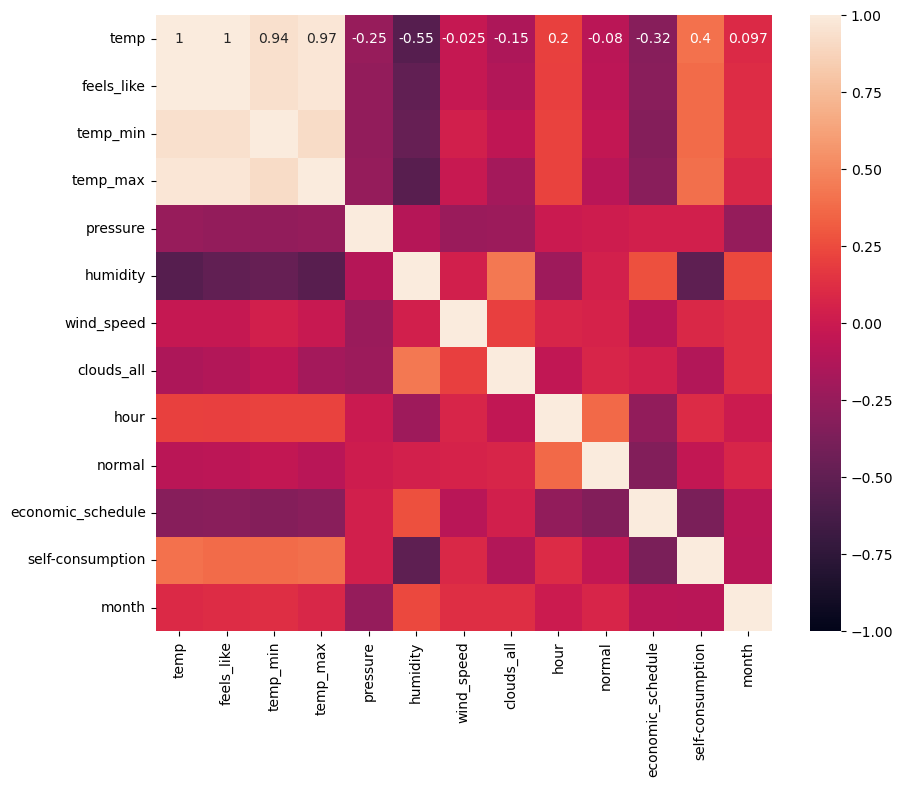

In [79]:
corr_matrix = df.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)

In [80]:
#print(corr_matrix['injection'])